## Microtask -2

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [6]:
df['btc_market_price'][1023]

13.6888

## Microtask - 3

In [7]:
import seaborn as sns

In [11]:
columns = df.columns

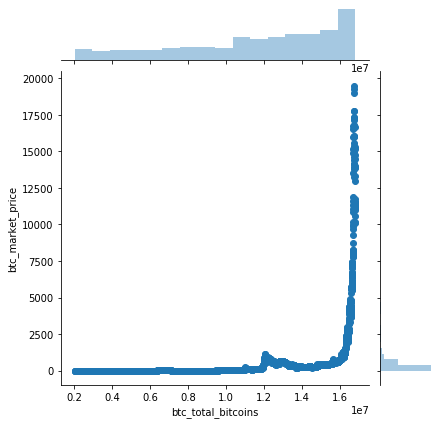

In [10]:
sns.jointplot(data=df,x='btc_total_bitcoins',y='btc_market_price')

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


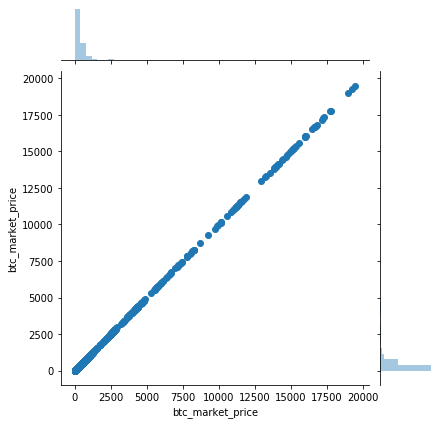

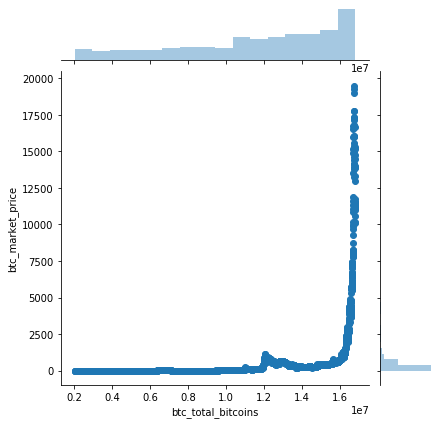

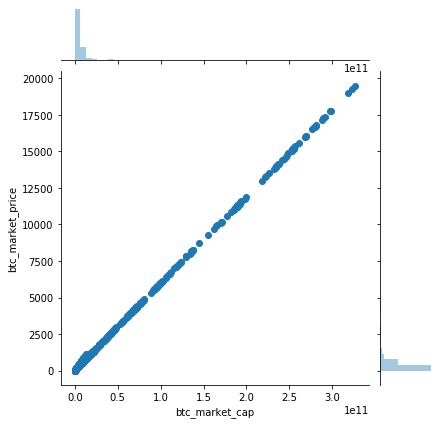

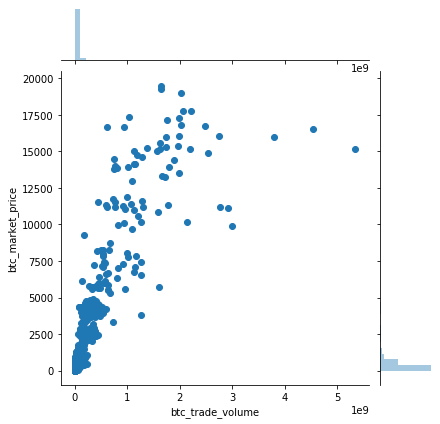

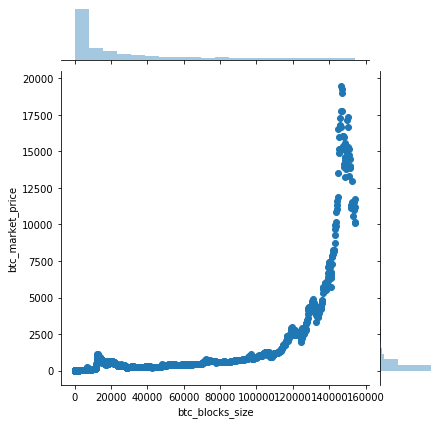

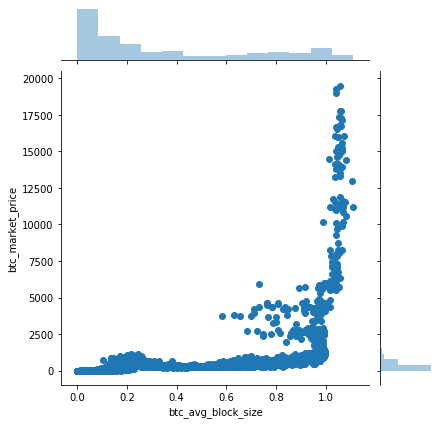

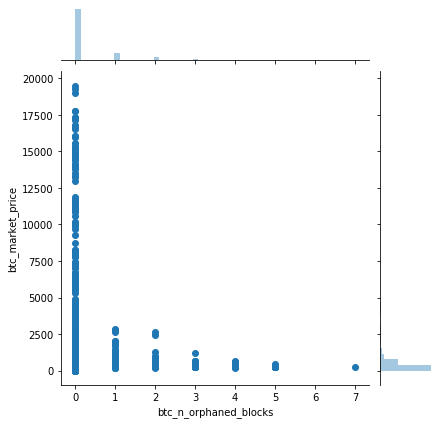

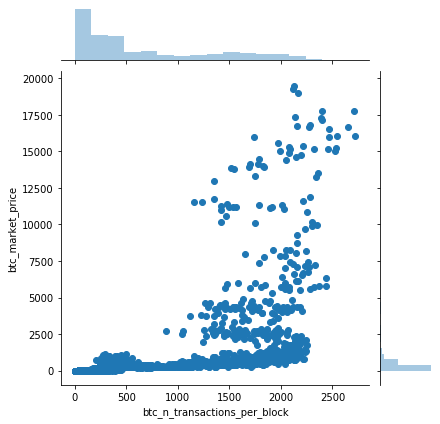

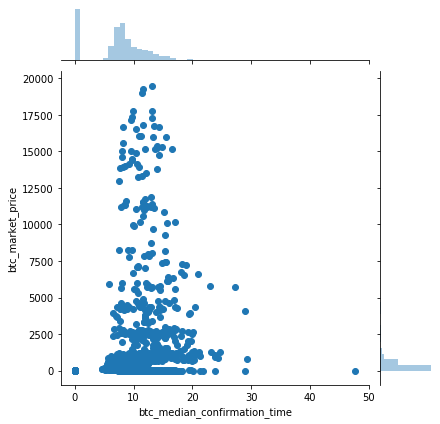

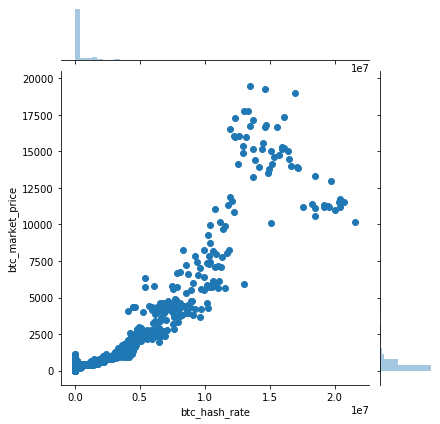

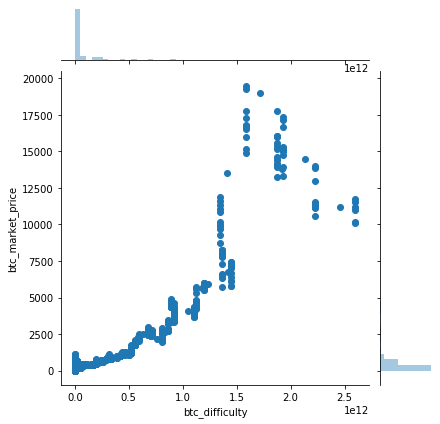

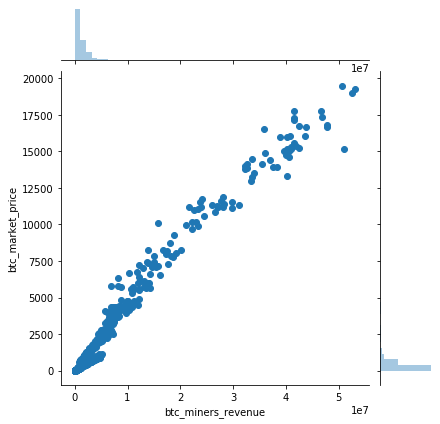

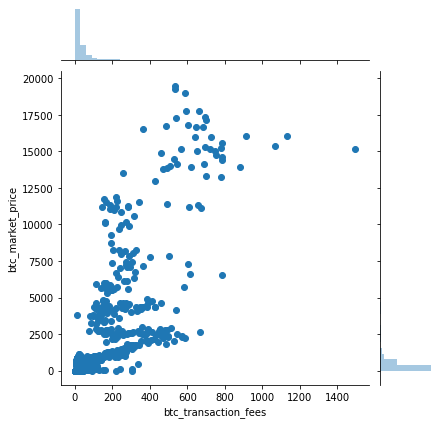

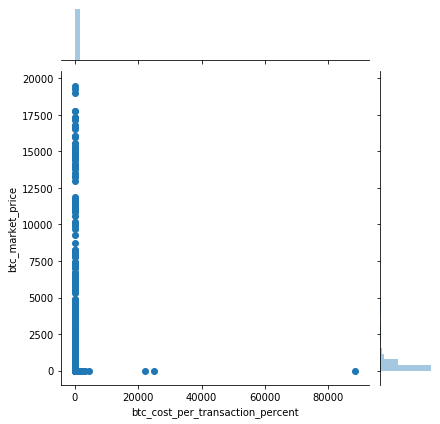

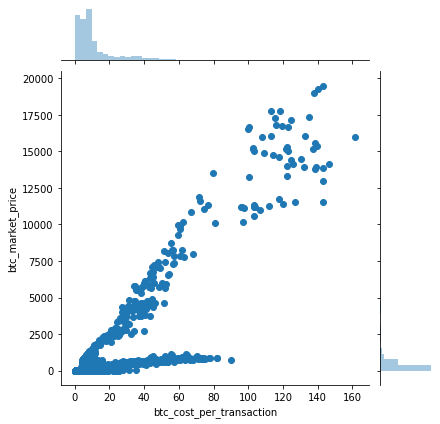

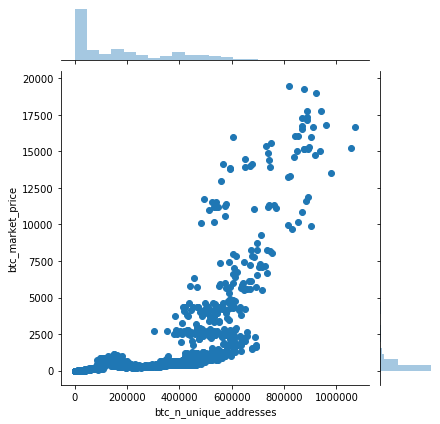

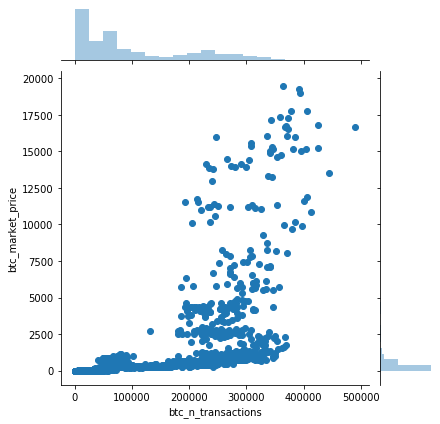

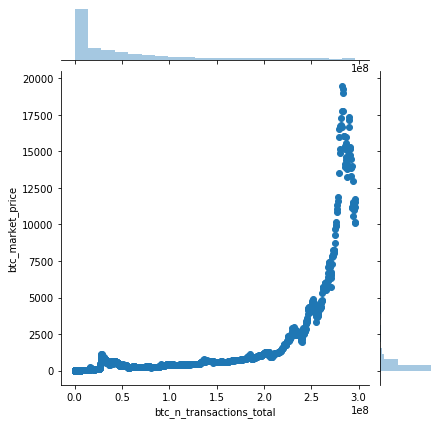

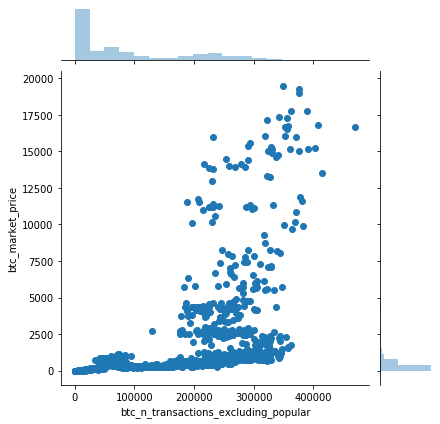

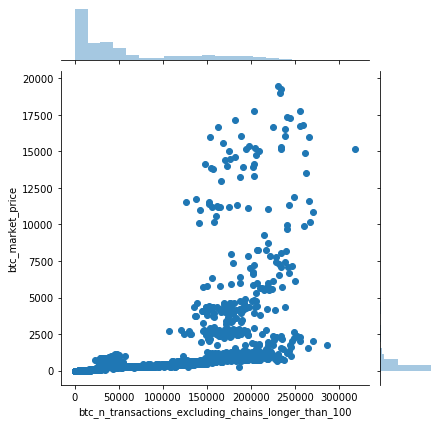

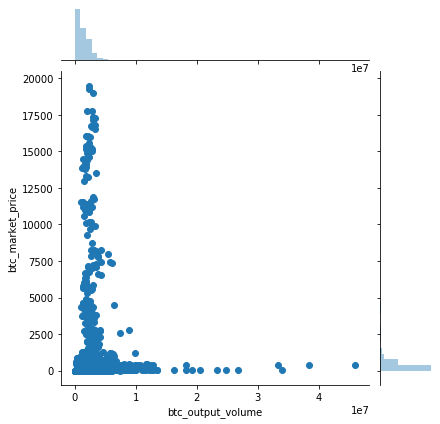

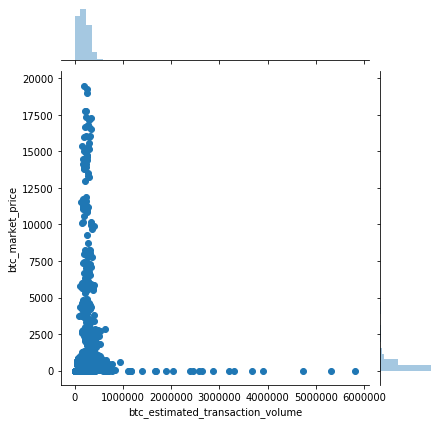

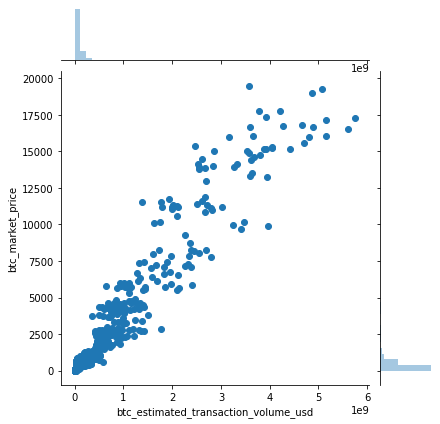

In [12]:
for i in columns[1:]:
    sns.jointplot(data=df,x=i,y='btc_market_price')

## Microtask - 4

In [13]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [14]:
X = df[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]

In [16]:
X.isnull().sum()

btc_market_cap                       0
btc_n_transactions                   0
btc_miners_revenue                   0
btc_cost_per_transaction             0
btc_difficulty                      16
btc_hash_rate                        0
btc_cost_per_transaction_percent     0
dtype: int64

In [17]:
X['btc_difficulty'].fillna(X['btc_difficulty'].mean(),inplace=True)

D:\anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
X.isnull().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
dtype: int64

## Microtask - 5

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,accuracy_score

In [22]:
X_train,X_test,Y_train,Y_test =  train_test_split(X,df['btc_market_price'],test_size=0.2)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = model.predict(X_train)

In [27]:
mean_squared_error(Y_train,y_pred)

398.25875588307895

In [32]:
y_pred_test = model.predict(X_test)

In [33]:
mean_squared_error(Y_test,y_pred_test)

449.6892101779231